## Title :
Exercise: Simple kNN Regression

## Description :
The goal of this exercise is to **re-create the plots** given below. You would have come across these graphs in the lecture as well.

![fig2](fig/fig2.png)
![fig3](fig/fig3.png)

## Data Description:

## Instructions:

<u>Part 1:</u> KNN by hand for k=1
- Read the Advertisement data.
- Get a subset of the data from row 5 to row 13.
- Apply the kNN algorithm by hand and plot the first graph as given above.

<u>Part 2:</u> Using sklearn package
- Read the Advertisement dataset.
- Split the data into train and test sets using the `train_test_split()` function.
- Set `k_list` as the possible k values ranging from 1 to 70.
- For each value of `k` in `k_list`:
    - Use `sklearn KNearestNeighbors()` to fit train data.
    - Predict on the test data.
    - Use the helper code to get the second plot above for k=1,10,70.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
advertising = pd.read_csv("data/Advertising.csv")
advertising.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

#### Part 1: KNN by hand for k=1

In [3]:
advertising_5_13 = advertising.iloc[5:14]
advertising_5_13

TV  Radio  Newspaper  Sales
5     8.7   48.9       75.0    7.2
6    57.5   32.8       23.5   11.8
7   120.2   19.6       11.6   13.2
8     8.6    2.1        1.0    4.8
9   199.8    2.6       21.2   10.6
10   66.1    5.8       24.2    8.6
11  214.7   24.0        4.0   17.4
12   23.8   35.1       65.9    9.2
13   97.5    7.6        7.2    9.7

In [6]:
x_true = advertising_5_13.TV.iloc[5:13].sort_values().values
y_true = advertising_5_13.Sales.iloc[5:13].loc[advertising_5_13.TV.iloc[5:13].sort_values().index].values
print(x_true, y_true)

[ 23.8  66.1  97.5 214.7] [ 9.2  8.6  9.7 17.4]


In [7]:
def find_nearest(array,value):
    idx = pd.Series(np.abs(array-value)).idxmin()
    return idx, array[idx]

In [13]:
x = np.linspace(np.min(x_true), np.max(x_true))
y = np.array([y_true[find_nearest(x_true, xi)[0]] for xi in x])

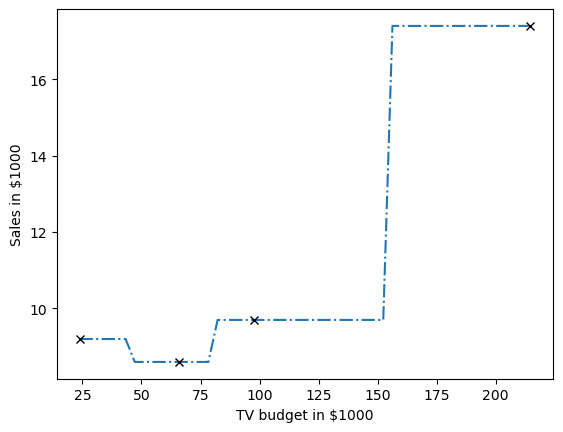

In [16]:
plt.plot(x, y, '-.')
plt.plot(x_true, y_true, 'kx')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')
plt.show()

#### Part 2: Using sklearn package

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [17]:
# Set 'TV' as the 'predictor variable'   
x = advertising[["TV"]]

# Set 'Sales' as the response variable 'y' 
y = advertising["Sales"]

In [20]:
# Split the dataset in training and testing with 60% training set 
# and 40% testing set with random state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,random_state=42)

In [21]:
# Choose the minimum k value based on the instructions given on the left
k_value_min = 1

# Choose the maximum k value based on the instructions given on the left
k_value_max = 70

# Create a list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, 70)

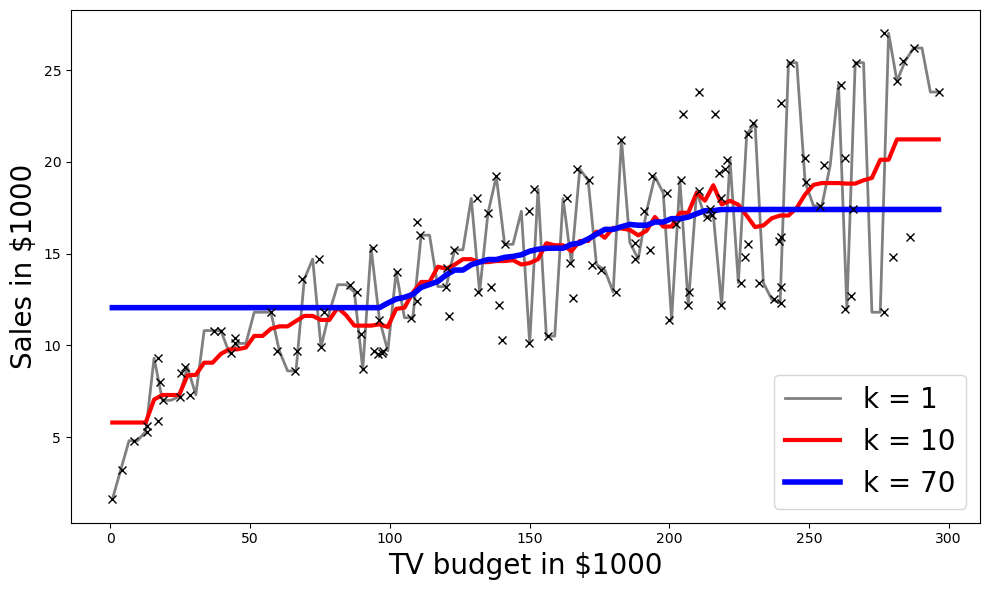

In [26]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))

# Variable used to alter the linewidth of each plot
j=0

# Loop over all the k values
for k_value in k_list:   
    
    # Creating a kNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fitting the regression model on the training data 
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data 
    y_pred = model.predict(x_test)
    
    # Helper code to plot the data along with the model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = pd.DataFrame({'TV': np.linspace(x['TV'].min(), x['TV'].max(), 100)})
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='train',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

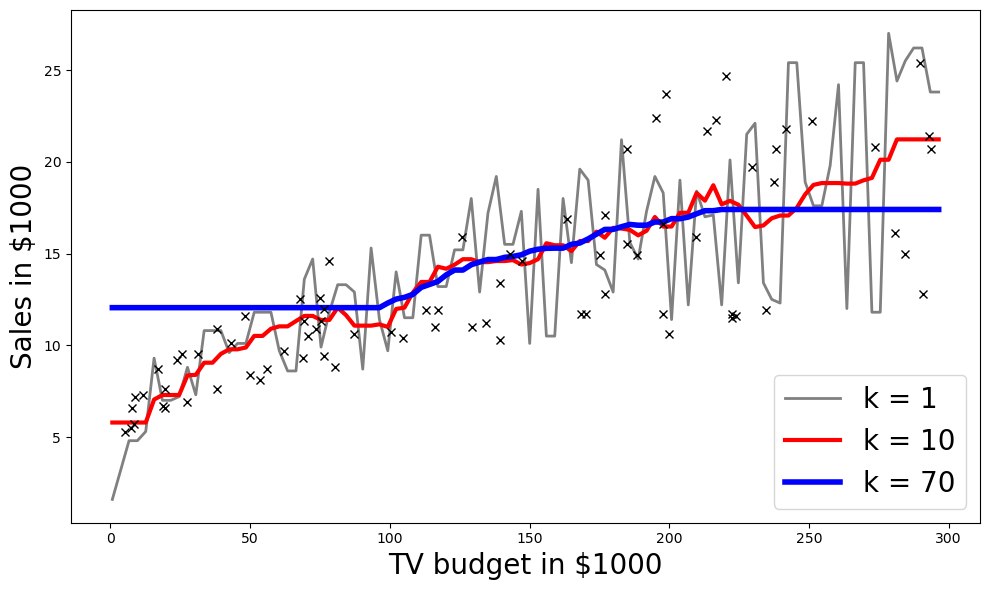

In [27]:
#Using test dataset

fig, ax = plt.subplots(figsize=(10,6))
j = 0

for k_value in k_list:   
    
    model = KNeighborsRegressor(n_neighbors=int(k_value))  # ✅ Fill 1
    
    model.fit(x_train, y_train)  # ✅ Fill 2
    
    y_pred = model.predict(x_test)  # ✅ Fill 3 (test data prediction)
    
    colors = ['grey', 'r', 'b']
    if k_value in [1, 10, 70]:
        xvals = pd.DataFrame({'TV': np.linspace(x['TV'].min(), x['TV'].max(), 100)})  # Keep as DataFrame
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds, '-', label=f'k = {int(k_value)}', linewidth=j+2, color=colors[j])
        j += 1

ax.legend(loc='lower right', fontsize=20)
ax.plot(x_test, y_test, 'x', label='test', color='k')  # ✅ Changed from train to test
ax.set_xlabel('TV budget in $1000', fontsize=20)
ax.set_ylabel('Sales in $1000', fontsize=20)
plt.tight_layout()

**Findings:**
 - k = 1 overfits (low bias, high variance).
 - k = 70 underfits (high bias, low variance).
 - k = 10 a good trade-off — smoother curve, less overfitting.